<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Model" data-toc-modified-id="Basic-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Model</a></span><ul class="toc-item"><li><span><a href="#Government-Spending-Shock" data-toc-modified-id="Government-Spending-Shock-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Government Spending Shock</a></span></li><li><span><a href="#Deriving-the-Keynesian-Multiplier" data-toc-modified-id="Deriving-the-Keynesian-Multiplier-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Deriving the Keynesian Multiplier</a></span></li></ul></li><li><span><a href="#The-IS-Curve" data-toc-modified-id="The-IS-Curve-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The IS Curve</a></span><ul class="toc-item"><li><span><a href="#Shift-vs-Slide" data-toc-modified-id="Shift-vs-Slide-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Shift vs Slide</a></span></li></ul></li><li><span><a href="#The-TR-Curve" data-toc-modified-id="The-TR-Curve-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The TR Curve</a></span></li><li><span><a href="#IS-TR-Equlibrium" data-toc-modified-id="IS-TR-Equlibrium-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IS-TR Equlibrium</a></span><ul class="toc-item"><li><span><a href="#Government-Spending-Shock" data-toc-modified-id="Government-Spending-Shock-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Government Spending Shock</a></span></li><li><span><a href="#Central-Bank-Policy-Shock" data-toc-modified-id="Central-Bank-Policy-Shock-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Central Bank Policy Shock</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

config = {'figure.figsize':(12, 4),
          'figure.dpi':72.0 * 2,
          'figure.facecolor':'w',
          'axes.grid':True,
          'grid.linewidth':0.5,
          'grid.linestyle':'--',
          'axes.spines.top':False,
          'axes.spines.bottom':False,
          'axes.spines.left':False,
          'axes.spines.right':False}

plt.rcParams.update(config)

# Basic Model

- No temporal dynamics
- No stochastic shocks
- Closed economy

Basic structural equation:

$$Y = C + I + G$$

with:

$$\begin{align} C &= C(\Omega, Y - \bar T)\\
                I &= I(q, r)\\
                G &= \bar G\end{align}$$
                
Classical Keynesians assumed that prices don't move in the short to medium term, so firms use inventories (and debt, I guess) to handle dis-equilbriums in the national accounting identity. Define so-called "Desired Demand":

$$DD = C(\Omega, Y - \bar T) + I(q, r) + \bar G$$

As the quantity of that the economy actually wants to consume, although this may not actually be $Y$, the amount produced. 

In [2]:
def C(Y, Ω=0, T_bar=0.1, a0=0, a1=1, b=0.8):
    """
    Consumption function in the IS-LM model
    
    Parameters
    ----------
    Y: float, array
        Total economic output (typically measured as GDP)
        
    Ω: float
        Household wealth, considered constant in the short-run (3-5 year horizon)
        
    a0: float
        Natural level of household consumption
        
    a1: float
        Marginal propensity to consume based on household wealth. Assumed positive.
        
    b: float
        Marginal propensity to consume based on economic output, net taxes. Assumed positive.
        
    Returns
    ----------
    C: float or array
        Level of household consumption
    """
    
    return a0 + a1 * Ω + b * (Y - T_bar)

def I(q, r, i0=0, i1=0.4, i2=-0.2):
    """
    Investment functionn in the IS-LM model
    
    Parameters
    ----------
    q: float
        Tobin's Q ratio, the ratio of all firm's financial valuation (market capitaliation) to
        the replacement value of their assets.
        
    r: float
        Rate of return on fixed capital investment. Assumed to be the short-term **REAL** interest
        rate, r = i - E[π]
        
    i0: float
        Natural level of household investment
        
    i1: float
        Marginal propensity to invest based on Tobin's Q. Assumed positive.
        
    i2: float
        Marginal propensity to invest based changes to the interest rate. Assumed negative.
        
    Returns
    ----------
    I: float
        Household fixed capital investment
    """
    
    return i0 + i1 * q + i2 * r

In [3]:
def plot_equlibrium(Y, DD, ax=None, 
                    return_ax=False, 
                    label_text='Equlibrium', 
                    lines_to_equlibrium=True,
                    text_offset=None,
                    title = r'IS Curve with $45^\degree$ Line',
                    legend=True):

    if not ax:
        fig, ax = plt.subplots(figsize=(8,8), dpi=77)
        
    text_offset = text_offset or [1, 1]
        
    ax.plot(Y, DD, label='IS')
    ax.plot(Y, Y, color='tab:red', ls='--', label=r'$45^\degree$')

    cross_idx = np.argmin((DD - Y) ** 2)
    ax.scatter(Y[cross_idx], DD[cross_idx], s=50, color='k', zorder=10)
    ax.annotate(text=label_text, 
                xy=(Y[cross_idx] * text_offset[0], DD[cross_idx] * text_offset[1]), 
                ha='right')
    
    if lines_to_equlibrium:
        ax.vlines(x=Y[cross_idx], ymin=0, ymax=DD[cross_idx], ls='--', color='k')
        ax.hlines(y=DD[cross_idx], xmin=0, xmax=Y[cross_idx], ls='--', color='k')

    ax.set(xlabel='Output (Y)', ylabel='Desired Demand (DD)')
    ax.set_title(title, fontsize=16)
    
    if legend:
        ax.legend(fontsize=16)
        
    if return_ax:
        return ax 
    else:
        plt.show()

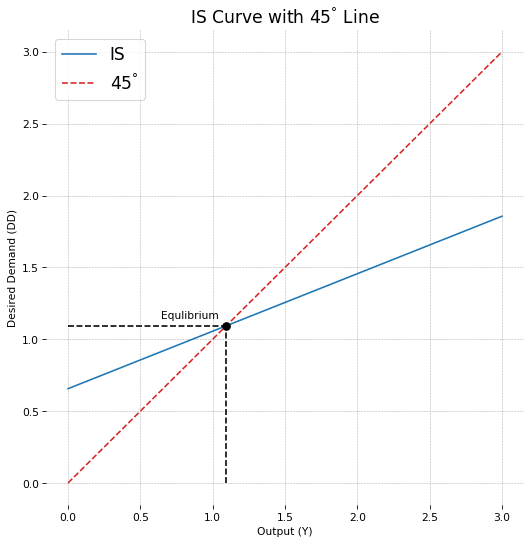

In [4]:
# Economic Variables
Ω = 0
Y = np.linspace(0, 3, 1000)
T_bar = 0.1
q = 1.00
r = 1.04
G_bar = 0.4

# Parameters
a0 = 0
a1 = 1
b  = 0.4
i0 = 0
i1 = 0.4
i2 = -0.1

DD = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar
plot_equlibrium(Y, DD, text_offset=[0.95, 1.05])

## Government Spending Shock

In [5]:
Y = np.linspace(0, 3, 1000)
G_bar = 0.4
ΔG = 0.4

DD = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

G_bar += ΔG
DD2 = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

def f_DD(Y):
    return C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

In [6]:
def add_staircase(Y, DD, DD2, f_DD, ax):
    cross_idx = np.argmin((DD - Y) ** 2)
    Y_current = Y[cross_idx]
    
    ax.vlines(x=Y_current, ymin=DD[cross_idx], ymax=DD2[cross_idx], ls='--', color='k')
    ax.hlines(y=DD2[cross_idx], xmin=Y_current, xmax=DD2[cross_idx], ls='--', color='k')

    for i in range(10):
        DD_current = f_DD(Y_current)
#         C(Y_current, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

        ax.vlines(x=Y_current, ymin=Y_current, ymax=DD_current, ls='--', color='k')
        ax.hlines(y=DD_current, xmin=Y_current, xmax=DD_current, ls='--', color='k')
        Y_current = DD_current
    
    return ax

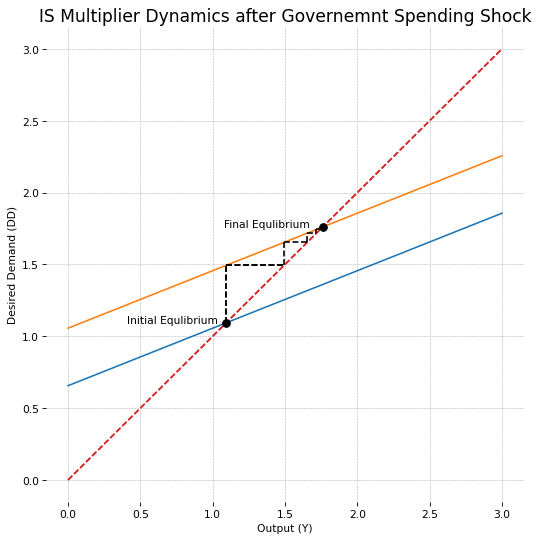

In [7]:
plot_kwargs = dict(return_ax=True, 
                   lines_to_equlibrium=False,
                   text_offset=[0.95, 1],
                   legend=False)

ax = plot_equlibrium(Y, DD, 
                     label_text='Initial Equlibrium', 
                     title='',
                    **plot_kwargs)
ax = plot_equlibrium(Y, DD2, 
                     label_text='Final Equlibrium', 
                     ax=ax, 
                     title=r'IS Multiplier Dynamics after Governemnt Spending Shock',
                     **plot_kwargs)

ax = add_staircase(Y, DD, DD2, f_DD, ax=ax)
plt.show()

## Deriving the Keynesian Multiplier

To get the value of the multiplier, we solve the linear system for $Y$:

$$\begin{align} Y &= C + I + G \\
                  &= a_0 + a_1 \Omega + b(Y - \bar T) + i_0 + i_1 q + i_2 r + \bar G \\
                (1 - b)Y &= a_0 + a_1 \Omega - b \bar T + i_0 + i_1 q + i_2 r + \bar G \\
                Y &= \frac{1}{1 - b} \left ( a_0 + a_1 \Omega - b \bar T + i_0 + i_1 q + i_2 r + \bar G \right ) \end{align} \tag{1}$$
                
So the multiplier is $\frac{1}{1 - b}$. This introduces the notion of *leakage*. The higher is the marginal propensity to consume (that's $b$), the more effect increases in government spending will have on stimulating economic activity. If households really like to save, that is, when $b$ is very low, the multiplier will be low as well.

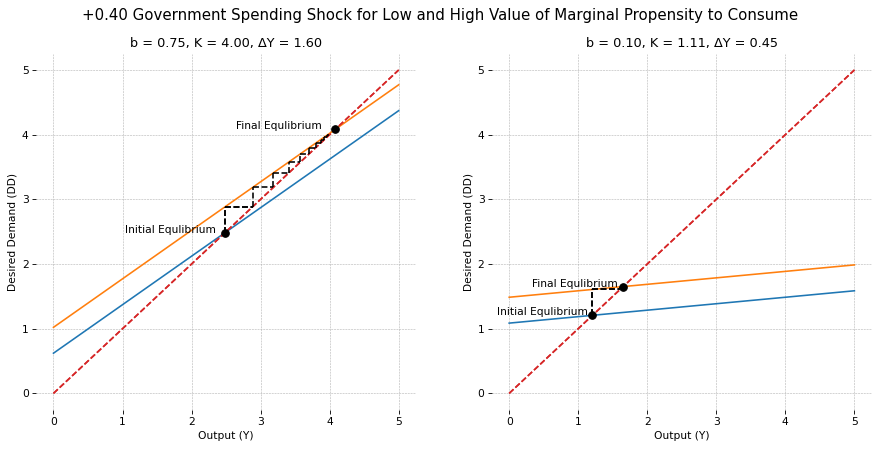

In [8]:
Y = np.linspace(0, 5, 1000)
G_bar = 0.4
ΔG = 0.4

fig, ax = plt.subplots(1, 2, figsize=(14,6), dpi=77)

for axis, b in zip(fig.axes, [0.75, 0.1]):
    DD = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

    G_bar += ΔG
    DD2 = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar

    def f_DD(Y):
        return C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I(q, r, i0=i0, i1=i1, i2=i2) + G_bar
    
    K = 1 / (1 - b)
    
    idx_0 = np.argmin((DD - Y) ** 2)
    idx_1 = np.argmin((DD2 - Y) ** 2)
    
    ΔY = Y[idx_1] - Y[idx_0]

    axis = plot_equlibrium(Y, DD, 
                         label_text='Initial Equlibrium',
                            ax=axis,
                        **plot_kwargs)
    axis = plot_equlibrium(Y, DD2, 
                         label_text='Final Equlibrium', 
                         ax=axis, 
                         **plot_kwargs)

    axis = add_staircase(Y, DD, DD2, f_DD, ax=axis)
    axis.set_title(f'b = {b:0.2f}, K = {K:0.2f}, ΔY = {ΔY:0.2f}')
fig.suptitle('+0.40 Government Spending Shock for Low and High Value of Marginal Propensity to Consume',
             fontsize=14)
plt.show()

# The IS Curve

We already have all the functions we need to look at the IS curve. We just need to re-write the desired demand function so that it gives interest rates as a function of output.

One change: Tobin's Q is itself a function of interest rates, so we need to make some assumptions. The book assumes that:

$$I = c + d Y + e i$$

Note that we are now looking at $i$, nominal interest, rather than $r$, real interest! It is assumed that $c$, and $d$ are positive, while $e$ is negative.

With these changes, we get:

$$ \begin{align}Y &= C + I + G \\
                Y &= a_0 + a_1 \Omega + b (Y - \bar T) + c + d Y + e i + \bar G \\ 
                (1 - b - d) Y &= a_0 + a_1 \Omega - b \bar T + c + e i + \bar G \\ 
                Y &= \frac{1}{1 - b - d} \left ( A + e i \right ) \end{align}\tag{2}$$
                
Where $A = a_0 + a_1 \Omega - b \bar T + c + \bar G$ is just a gathering of all the constant terms in the model.

Compared to (1), the the Keyensian multiplier, $K = \frac{1}{1 - b - d}$ in (2) now has a new term to reflect the fact that investment is endogenously linked to output via Tobin's Q.

To get the IS curve, solve (1) for $i$:

$$i = \frac{1}{e} \left ( \frac{Y}{K} - A \right) $$

In [9]:
def I2(Y, i, c=0, d=0.2, e=-0.5):
    """
    Another investment function in the IS-LM model. This one eliminates Tobin's Q by
    modeling it as a linear functon of economic output and the rate of return on capital.
    
    Parameters
    ----------
    Y: float or array
        Total economic output
    i: float
        The **Nominal** interest rate, i = r + E[π]
    c: float
        Natural rate of investment. Assumed positive.
    d: float
        Marginal rate of investment w.r.t. changes in economic output. Assumed positive.
    e: float
        Marginal rate of investment w.r.t changes in the nominal interest rate. Assumed negative.
        
    Returns
    ----------
    I: float or array
        Household investment
    """
    
    return c + d * Y + e * i

In [10]:
# Economic Variables
Ω = 0
Y = np.linspace(0, 5, 1000)
T_bar = 0.1
i = 1.04
G_bar = 0.4

# Parameters
a0 = 0
a1 = 1
b  = 0.4

c = 1
d = 0.3
e = -0.9

K = 1 / (1 - b - d)
A = a0 + a1 * Ω - b * T_bar + c + G_bar

i_array = (1 / e) * ((1 / K) * Y - A)

DD = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I2(Y, i=1.04, c=c, d=d, e=e) + G_bar
DD2 = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I2(Y, i=0.8, c=c, d=d, e=e) + G_bar

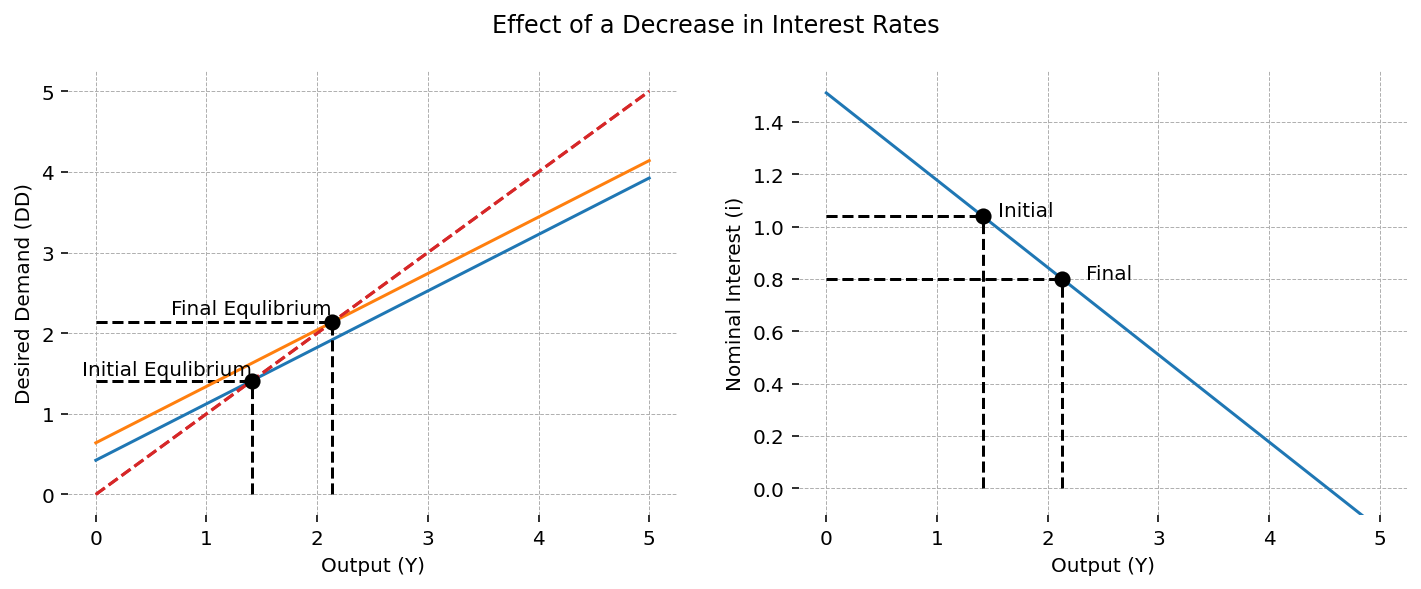

In [11]:
fig, ax = plt.subplots(1, 2)

ax[0] = plot_equlibrium(Y, DD, ax=ax[0], return_ax=True, text_offset=[1, 1.05], label_text='Initial Equlibrium', legend=False, title='')
ax[0] = plot_equlibrium(Y, DD2, ax=ax[0], return_ax=True, text_offset=[1, 1.05], label_text='Final Equlibrium', legend=False, title='')

ax[1].plot(Y, i_array)
for i, text in zip([1.04, 0.8], ['Initial', 'Final']):
    cross_idx = np.argmin((i_array - i) ** 2)
    ax[1].hlines(y=i, xmin=0, xmax=Y[cross_idx], ls='--', color='k')
    ax[1].vlines(x=Y[cross_idx], ymin=0, ymax=i, ls='--', color='k')
    ax[1].scatter(Y[cross_idx], i, s=50, zorder=4, c='k')
    ax[1].annotate(text=text, xy=(Y[cross_idx] * 1.1, i), ha='left')

labels = ['Desired Demand (DD)', 'Nominal Interest (i)']
titles = ['Demand Schedule', 'IS-Curve']
for axis, label in zip(fig.axes, labels):
    axis.set(xlabel='Output (Y)', ylabel=label)

ymin, ymax = ax[1].get_ylim()
ax[1].set_ylim(-0.1, ymax)
fig.suptitle('Effect of a Decrease in Interest Rates')
plt.show()

## Shift vs Slide

Above we saw a slide *along* the IS curve, because we adjusted $i$ while leaving all other endogenous parameters fixed. If we shift one of the parameters, like government spendinng, the IS curve will shift as well.

In [12]:
i = 1.04
G_bar = 0.4

K = 1 / (1 - b - d)
A = a0 + a1 * Ω - b * T_bar + c + G_bar

i_array = (1 / e) * ((1 / K) * Y - A)

DD = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I2(Y, i=i, c=c, d=d, e=e) + G_bar

ΔG = 0.4
G_bar += ΔG

def f_DD(Y):
    return C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I2(Y, i=i, c=c, d=d, e=e) + G_bar

DD2 = C(Y, Ω, T_bar, a0=a0, a1=a1, b=b) + I2(Y, i=i, c=c, d=d, e=e) + G_bar
A = a0 + a1 * Ω - b * T_bar + c + G_bar

i_array2 = (1 / e) * ((1 / K) * Y - A)


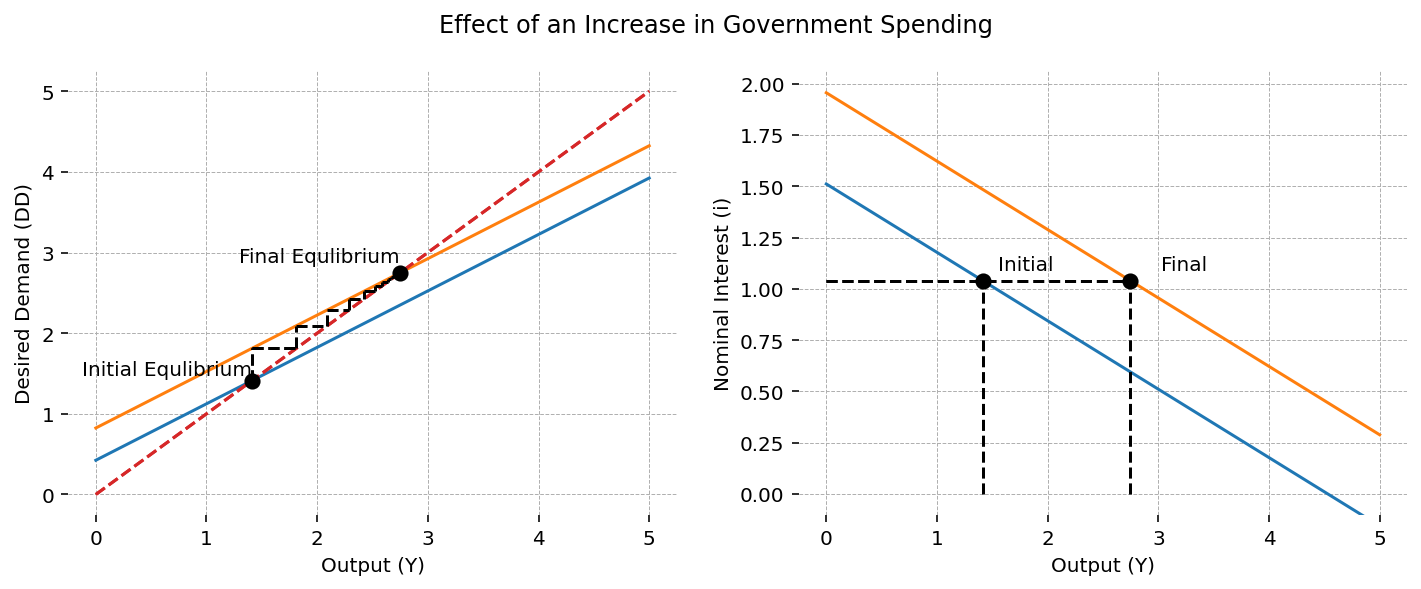

In [13]:
fig, ax = plt.subplots(1, 2)

plot_params = dict(return_ax=True, text_offset=[1, 1.05], lines_to_equlibrium=False, legend=False, title='')

ax[0] = plot_equlibrium(Y, DD, ax=ax[0],  label_text='Initial Equlibrium', **plot_params)
ax[0] = plot_equlibrium(Y, DD2, ax=ax[0], label_text='Final Equlibrium', **plot_params)
ax[0] = add_staircase(Y, DD, DD2, f_DD, ax[0])

for array, text in zip([i_array, i_array2], ['Initial', 'Final']):
    ax[1].plot(Y, array)

    cross_idx = np.argmin((array - i) ** 2)
    ax[1].hlines(y=i, xmin=0, xmax=Y[cross_idx], ls='--', color='k')
    ax[1].vlines(x=Y[cross_idx], ymin=0, ymax=i, ls='--', color='k')
    ax[1].scatter(Y[cross_idx], i, s=50, zorder=4, c='k')
    ax[1].annotate(text=text, xy=(Y[cross_idx] * 1.1, i * 1.05), ha='left')

labels = ['Desired Demand (DD)', 'Nominal Interest (i)']
titles = ['Demand Schedule', 'IS-Curve']
for axis, label in zip(fig.axes, labels):
    axis.set(xlabel='Output (Y)', ylabel=label)

ymin, ymax = ax[1].get_ylim()
ax[1].set_ylim(-0.1, ymax)
fig.suptitle('Effect of an Increase in Government Spending')
plt.show()

# The TR Curve

The Taylor Rule describes the policy central bank. Here we consider a simple linear Taylor Rule:

$$i = \bar i + \alpha (\pi - \bar \pi) + \beta \left ( \frac{Y - \bar Y}{\bar Y} \right ) $$

Where $\bar i$, $\bar \pi$, and $\bar Y$ are central bank targets for interest rates, inflation, and economic output, respectively. It is important to note that these are simply chosen by the Bank! They don't reflect any underlying economic "reality".

This Taylor Rule shows a bank with a so-called "dual mandate". The bank cares about both controlling inflation and acheiving economic growth. The relative preference between these parameters are controlled by $\alpha$ and $\beta$. 

In [14]:
def taylor_rule(Y, pi=0, i_bar=1, pi_bar=1, Y_bar=1, α=0, β=0.1):
    """
    The taylor rule describing central bank policy.
    
    Parameters
    ----------
    Y: float or array
        Economic output
    pi: float
        Inflation
    i_bar: float
        Target interest rate for the economy
    pi_bar: float
        Target level of inflation for the economy
    Y_bar: float
        Target economic output
    alpha: float
        The central bank's sensitivity to deviations from the target level of inflation.
        Assumed positive.
    beta: float
        The central bank's sensitivity to deviations from the target economic output.
        Assumed positive.
        
    Returns
    ---------
    i: float or array
        The central bank's chosen nominal interest rate
    """
    
    return i_bar + α * (pi - pi_bar) + β * (Y - Y_bar) / Y_bar

In [15]:
# Economic Variables
Ω = 0
Y = np.linspace(0, 5, 1000)
T_bar = 0.1
i = 1.04
G_bar = 0.4

# Parameters
# Consumption
a0 = 0
a1 = 1
b  = 0.4

# Investment
c = 1
d = 0.3
e = -0.9

# Taylor Rule
α = 0
β = 0.3
Y_bar = 2
i_bar = 1


K = 1 / (1 - b - d)
A = a0 + a1 * Ω - b * T_bar + c + G_bar

# IS Curve
IS_curve = (1 / e) * ((1 / K) * Y - A)

# TR Curve
TR_curve = taylor_rule(Y=Y, α=α, β=β, Y_bar=Y_bar, i_bar=i_bar)

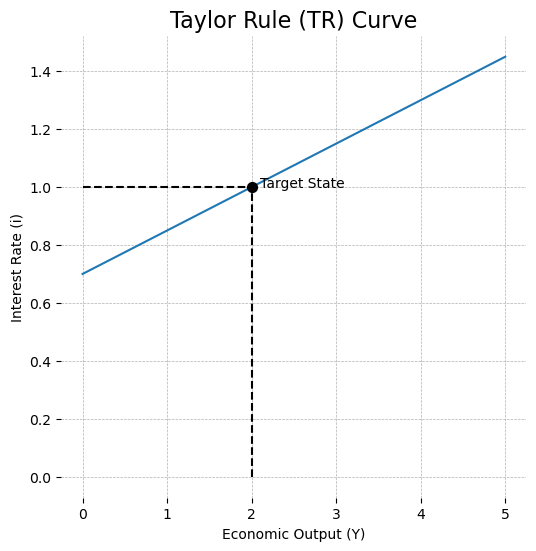

In [16]:
line_kwargs = dict(ls='--', color='k')

fig, ax = plt.subplots(figsize=(6,6), dpi=100)

cross_idx = np.argmin((TR_curve - i_bar) ** 2)

ax.plot(Y, TR_curve)
ax.hlines(y=i_bar, xmin=0, xmax=Y[cross_idx], **line_kwargs)
ax.vlines(x=Y[cross_idx], ymin=0, ymax=i_bar, **line_kwargs)
ax.scatter(Y[cross_idx], i_bar, s=50, c='k', zorder=5)
ax.annotate('Target State', xy=(Y[cross_idx] * 1.05, i_bar), ha='left')

ax.set(xlabel = 'Economic Output (Y)', ylabel='Interest Rate (i)')
ax.set_title('Taylor Rule (TR) Curve', fontsize=16)
plt.show()


# IS-TR Equlibrium

The economy is always on the TR curve by definition, and it can't be off the IS curve for very long. So the economy is in equlibrium when it's at the intersection of the two curves.

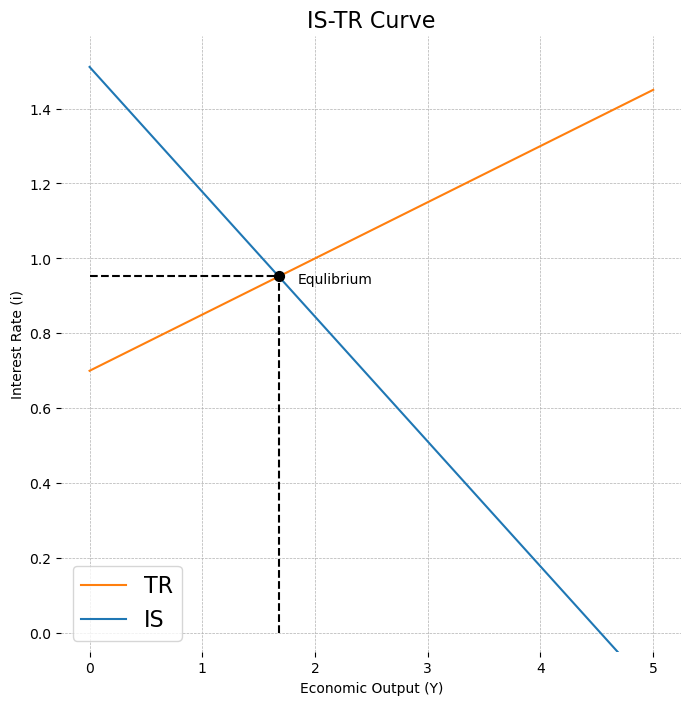

In [17]:
def plot_IS_TR(Y, Ω=0, T_bar=0.1, i=1.04, G_bar=0.4,
              a0 = 0, a1 = 1, b = 0.4,
              c = 1, d = 0.3, e = -0.9,
              α = 0, β = 0.3, Y_bar = 2, i_bar = 1,
              ax=None, return_ax=False, label_text='Equlibrium', label_offset=None,
              legend=True, is_color='tab:blue', tr_color='tab:orange'):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    label_offset = label_offset or [1.0, 1.0]
    K = 1 / (1 - b - d)
    A = a0 + a1 * Ω - b * T_bar + c + G_bar

    # IS Curve
    IS_curve = (1 / e) * ((1 / K) * Y - A)

    # TR Curve
    TR_curve = taylor_rule(Y=Y, α=α, β=β, Y_bar=Y_bar, i_bar=i_bar)

    line_kwargs = dict(ls='--', color='k')

    ax.plot(Y, TR_curve, c=tr_color, label='TR')
    ax.plot(Y, IS_curve, c=is_color, label='IS')

    cross_idx = np.argmin((TR_curve - IS_curve) ** 2)

    Y_star = Y[cross_idx]
    i_star = IS_curve[cross_idx]

    ax.hlines(y=i_star, xmin=0, xmax=Y_star, **line_kwargs)
    ax.vlines(x=Y_star, ymin=0, ymax=i_star, **line_kwargs)
    ax.scatter(Y_star, i_star, s=50, c='k', zorder=5)
    ax.annotate(label_text, xy=(Y_star * label_offset[0], i_star * label_offset[1]), ha='left')

    ymin, ymax = ax.get_ylim()

    ax.set(xlabel = 'Economic Output (Y)', ylabel='Interest Rate (i)', ylim=(-0.05, ymax))
    
    if legend:
        ax.legend(fontsize=16)
    
    if return_ax:
        return ax 
    
    plt.show()
    
ax = plot_IS_TR(Y, label_offset=[1.1, 0.98], return_ax=True)
ax.set_title('IS-TR Curve', fontsize=16)
plt.show()

## Government Spending Shock

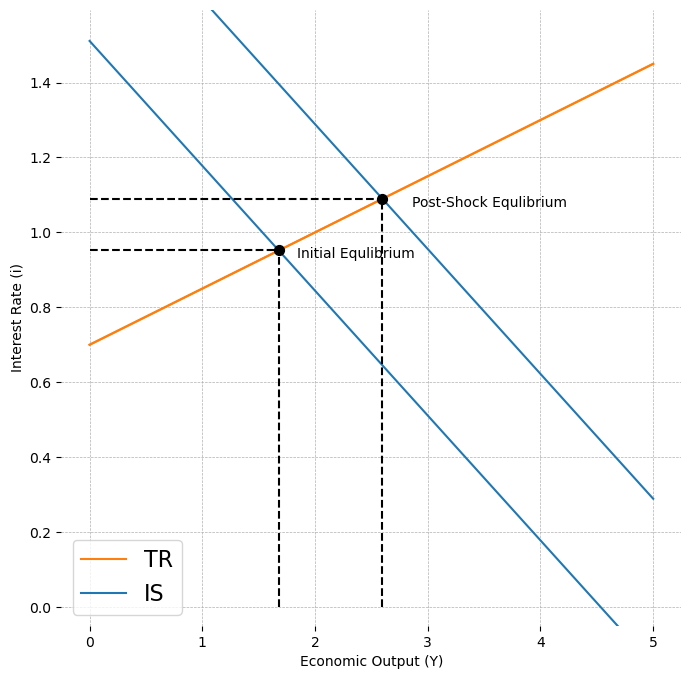

In [18]:
ax = plot_IS_TR(Y, label_text='Initial Equlibrium', label_offset=[1.1, 0.98], return_ax=True)
plot_IS_TR(Y, G_bar=0.8, label_text='Post-Shock Equlibrium', label_offset=[1.1, 0.98], ax=ax, legend=False)
plt.show()


## Central Bank Policy Shock

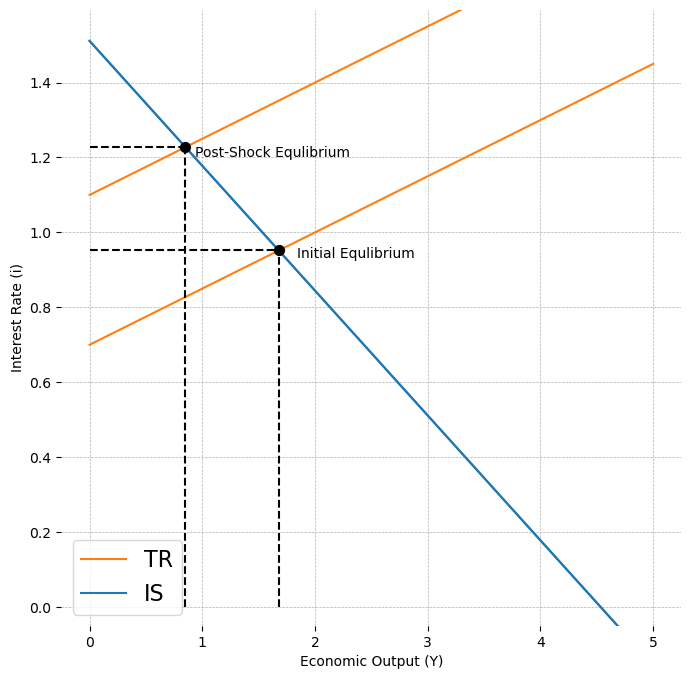

In [19]:
ax = plot_IS_TR(Y, label_text='Initial Equlibrium', label_offset=[1.1, 0.98], return_ax=True)
plot_IS_TR(Y, i_bar=1.4, label_text='Post-Shock Equlibrium', label_offset=[1.1, 0.98], ax=ax, legend=False)
plt.show()


# Data

In [20]:
import pandas as pd
accounts = pd.read_csv('data/OECD_national_accounts.csv', parse_dates=['TIME'], infer_datetime_format=True)
interest = pd.read_csv('data/OECD_interest_rates.csv', parse_dates=['TIME'], infer_datetime_format=True)
gdp = accounts.pivot_table(index=['LOCATION', 'TIME'], columns='INDICATOR', values='Value')['GDPCPC']
interest = interest.pivot_table(index=['LOCATION', 'TIME'], columns='Subject', values='Value')

usa_interest = interest.xs(key='USA').iloc[:, 1].mul(1e-2)
usa_gdp = gdp.unstack(0).USA

In [21]:
import statsmodels.api as sm

business_cycle, gdp_trend = sm.tsa.filters.hpfilter(usa_gdp, lamb=6.25)
output_gap = ((usa_gdp - gdp_trend) / gdp_trend)

Text(0.5, 1.0, 'TR Curves in the United States')

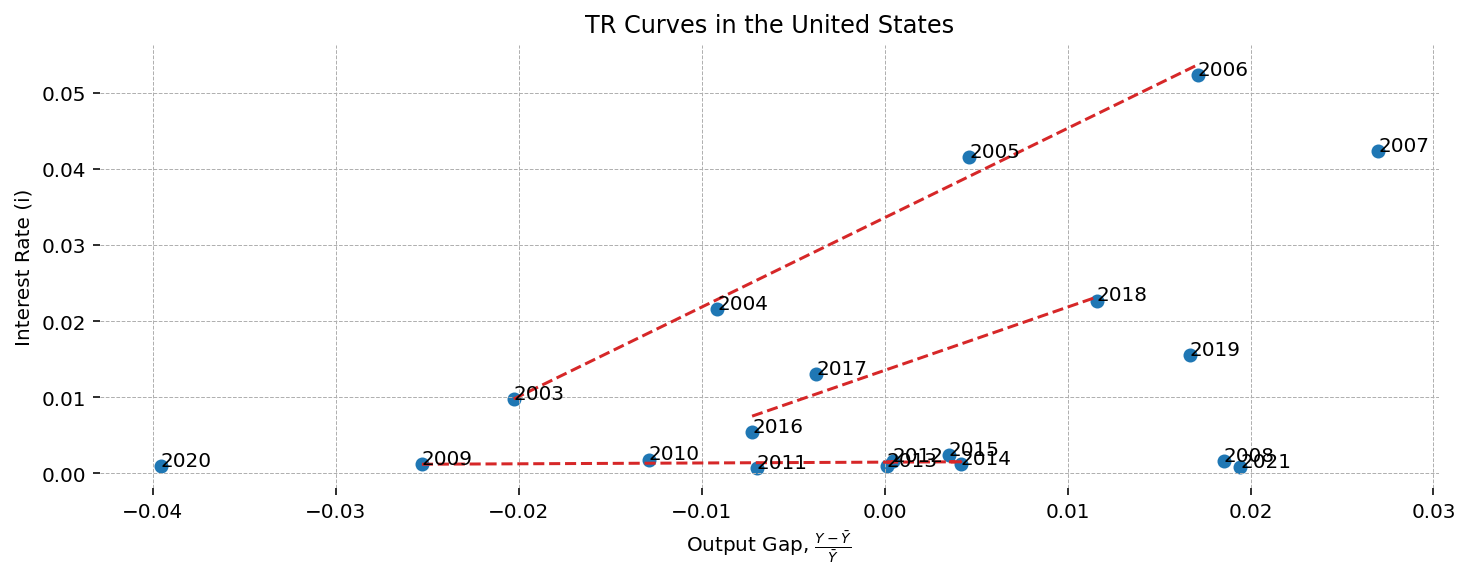

In [22]:
fig, ax = plt.subplots()
start = '2003'
date_slice = slice(start, None)
scatter = ax.scatter(output_gap.loc[date_slice], usa_interest.loc[date_slice])
ax.set(xlabel=r'Output Gap, $\frac{Y - \bar Y}{\bar Y}$', ylabel='Interest Rate (i)')

data = output_gap.to_frame().join(usa_interest).loc[date_slice]

groups = []
group = []
for date, row in data.iterrows():
    year = date.year
    ax.annotate(xy=row.values, text=year)
    if year > int(start):
        dx = row.values[0] - last_row[0]
        dy = row.values[1] - last_row[1]
        if ((dx > 0) and (dy > -0.005)) or (abs(dx) < 0.005 and abs(dy) < 0.005):
            group.extend([year-1, year])
        else:
            groups.append(list(set((group))))
            group = []
    last_row = row.values

for group in [x for x in groups if len(x) > 0]:
    group_data = data.loc[data.index.year.isin(group), :]
    y = group_data.iloc[:, 1]
    X = group_data.iloc[:, 0].to_frame().assign(constant = 1)
    ols = sm.OLS(y, X).fit()
    ax.plot(X.iloc[:, 0], ols.predict(X), color='tab:red', ls='--')
    
ax.set_title('TR Curves in the United States')